# load saved episode data and test plotting functions

Load the necessary library

In [3]:
import numpy as np
import os
import sys

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plot_experiment import plot_episode_data_virtual, plot_one_episode, plot_trajectories_GoToXY, plot_single_xy_pose
import matplotlib.cm as cm



In [4]:
load_dir = "../evaluations/icra24/"
experiments = os.listdir(load_dir)
# remove the .png files or .csv files
experiments = [experiment for experiment in experiments if ".png" not in experiment and ".csv" not in experiment]
print(experiments)
# getting all the actions for all the episodes under the @load_dir experiments
all_actions = [pd.read_csv(load_dir + experiment + "/" + ep + "/actions.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]

['nominal_GoToXY_MLP_expRew_PE_0.02', 'nominal_GoToXY_MLP_r2_expRew', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.03', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.01', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.02', 'nominal_GoToXY_MLP_r2_expRew_PE_0.01', 'nominal_GoToXY_MLP_linRew_PE_0.04', 'nominal_GoToXY_MLP_linRew_PE_0.05', 'nominal_GoToXY_MLP_r1_expRew_PE_0.03', 'nominal_GoToXY_MLP_linRew_PE_0.02', 'nominal_GoToXY_MLP_r1_expRew_PE_0.05', 'nominal_GoToXY_MLP_linRew_PE_0.03', 'nominal_GoToXY_MLP_expRew', 'nominal_UF_0.25_GoToXY_MLP_expRew', 'nominal_GoToXY_MLP_r1_expRew_PE_0.01', 'nominal_GoToXY_MLP_expRew_PE_0.01', 'nominal_GoToXY_MLP_r1_expRew', 'nominal_GoToXY_MLP_expRew_PE_0.05', 'nominal_GoToXY_MLP_linRew', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.04', 'nominal_GoToXY_MLP_expRew_PE_0.03', 'nominal_GoToXY_MLP_expRew_PE_0.04', 'nominal_GoToXY_MLP_r1_expRew_PE_0.02', 'nominal_GoToXY_MLP_r2_expRew_PE_0.02', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05', 'nominal_GoToXY_MLP_linRew_PE_0.01', 'nomi

# LAB EXPERIMENTS

Best model:
nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05    

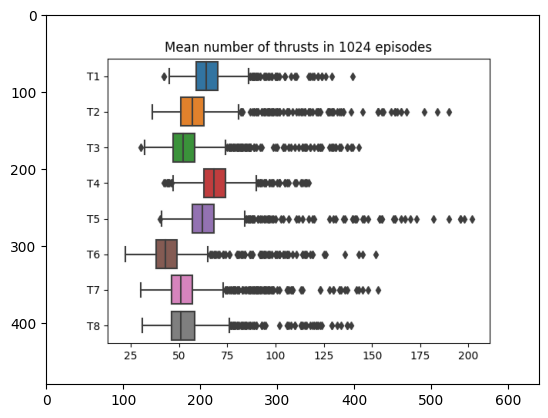

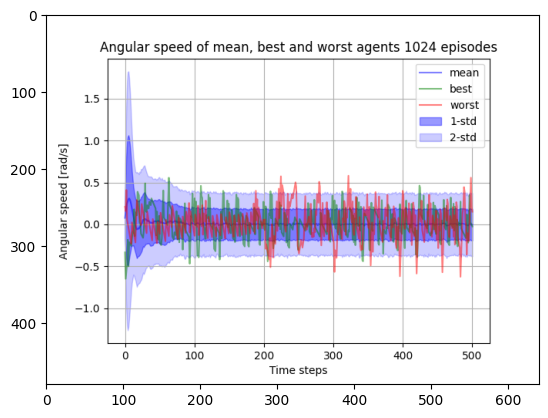

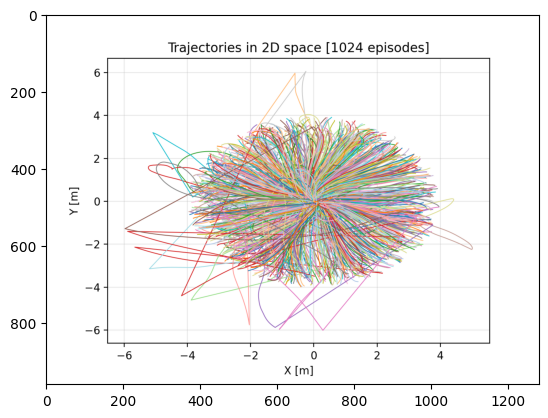

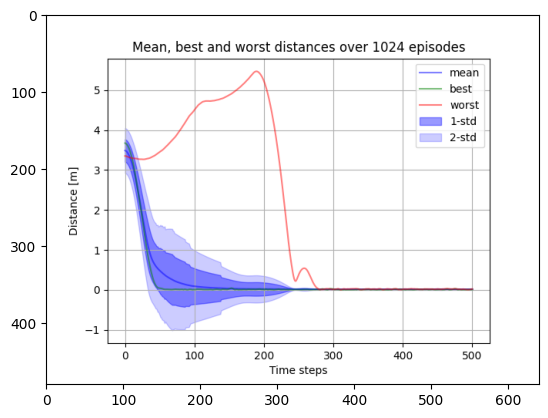

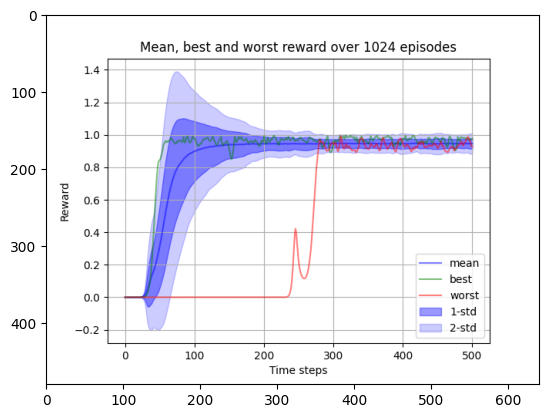

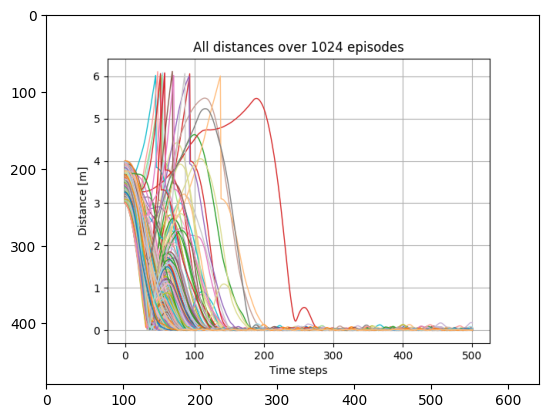

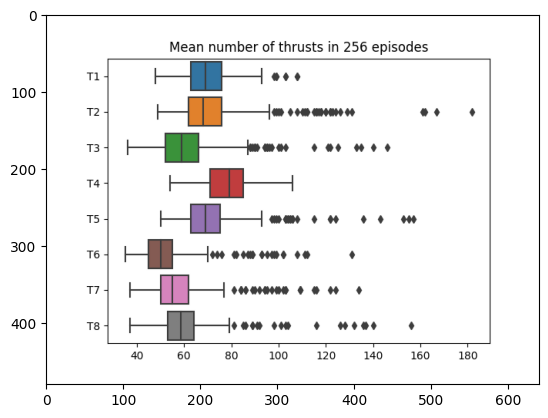

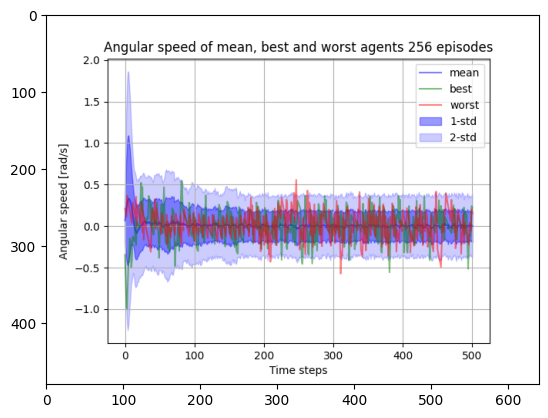

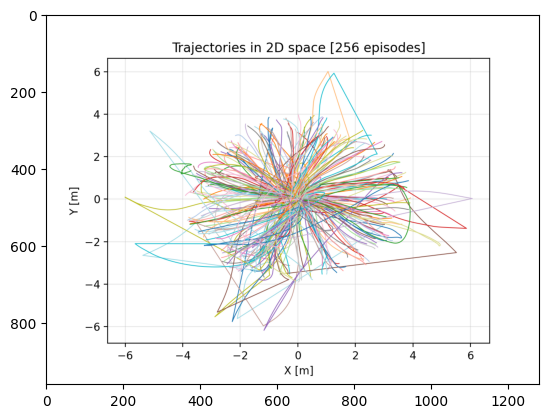

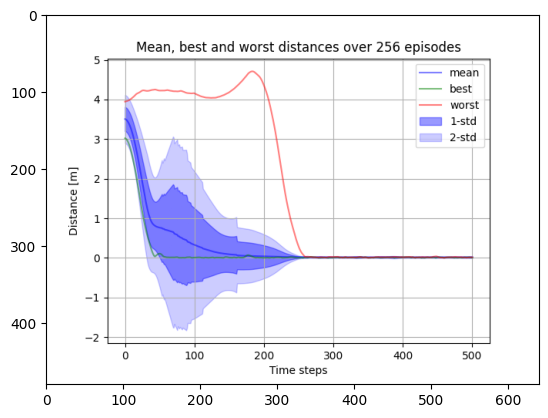

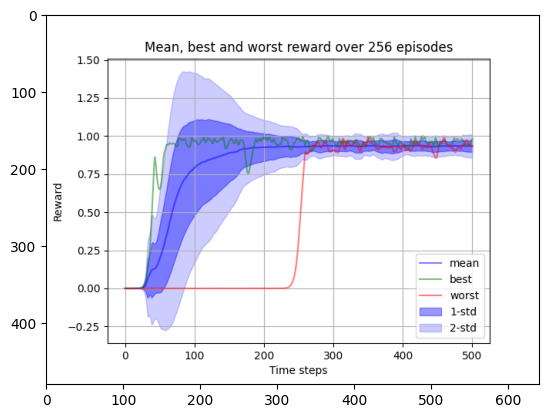

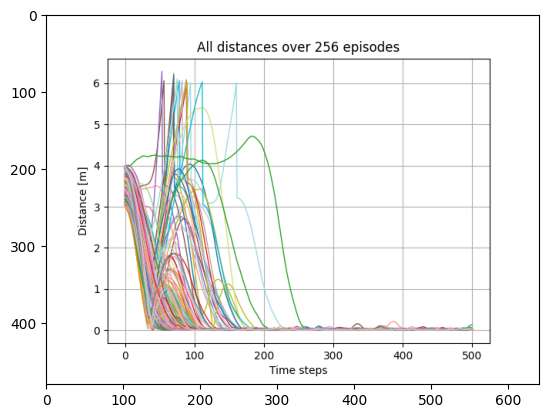

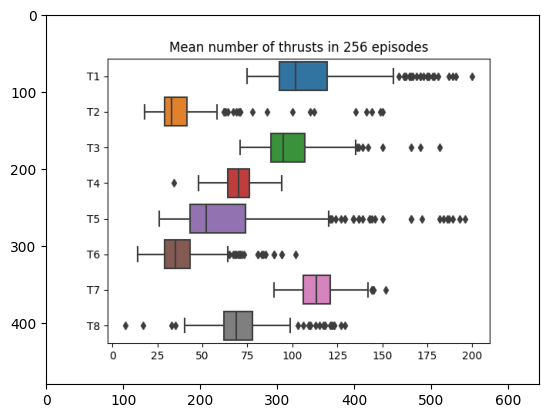

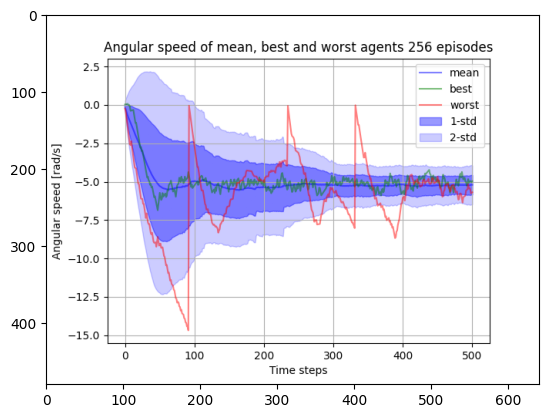

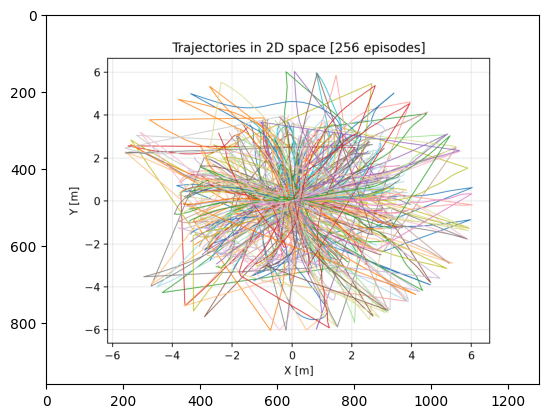

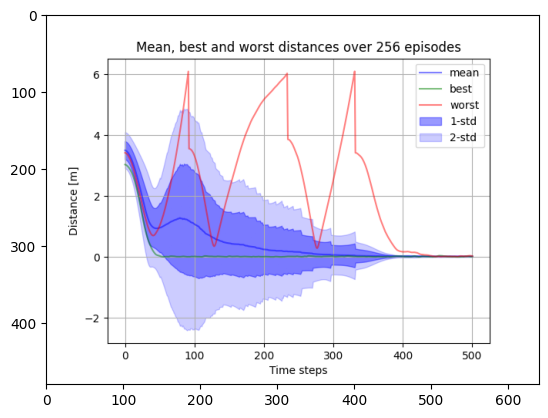

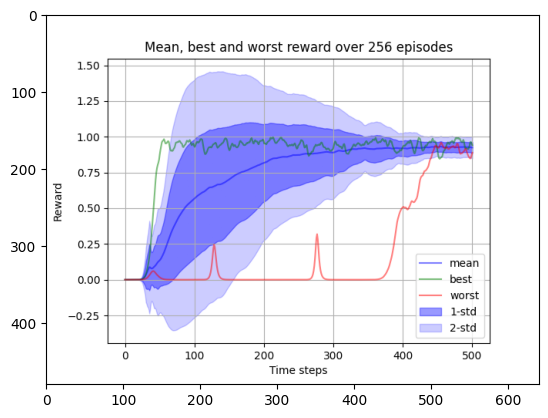

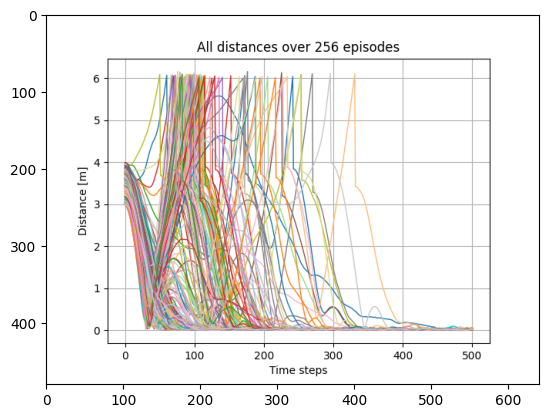

In [5]:
# Load the plots (png files) from the folder of the best model evaluated, and show them in the notebook
best_models = ['nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05', 'nominal_GoToXY_MLP_r1_expRew_PE_0.05', 'nominal_GoToXY_MLP_expRew_PE_0.05']
for best_model in best_models:
    best_model_dir = load_dir + best_model + "/"
    best_model_plots = [best_model_dir + ep for ep in os.listdir(best_model_dir) if ".png" in ep]
    for plot in best_model_plots:
        plt.figure()
        plt.imshow(plt.imread(plot))
        plt.show()



In [6]:
def plot_single_pose_traj(state_history, ax, **kwargs):
    """
    Plot position of a single agent with varying colors based on heading error."""

    pos_error = state_history[:, 6:8]
    heading_error = state_history[:, 8:]

    x, y = pos_error[:, 0], pos_error[:, 1]
    
    # Use a custom colormap based on the heading error
    colors = np.arctan2(heading_error[:, 1], heading_error[:, 0])

    # Create a scatter plot with varying colors
    sc = ax.scatter(x, y, c=colors, cmap='jet_r', alpha=0.8, linewidth=0.5, **kwargs)
    return sc

def plot_single_xy_traj(state_history, ax, color, **kwargs):
    """
    Plot position of a single agent with a constant color for the entire trajectory."""

    pos_error = state_history[:, 6:8]
    
    x, y = pos_error[:, 0], pos_error[:, 1]

    # Create a scatter plot with a constant color for the entire trajectory
    sc = ax.scatter(x, y, color=color, alpha=0.8, linewidth=0.75, **kwargs)
    return sc


## GO TO POSE RL

Plotting episode 1 of 6
Plotting episode 2 of 6
Plotting episode 3 of 6
Plotting episode 4 of 6
Plotting episode 5 of 6
Plotting episode 6 of 6


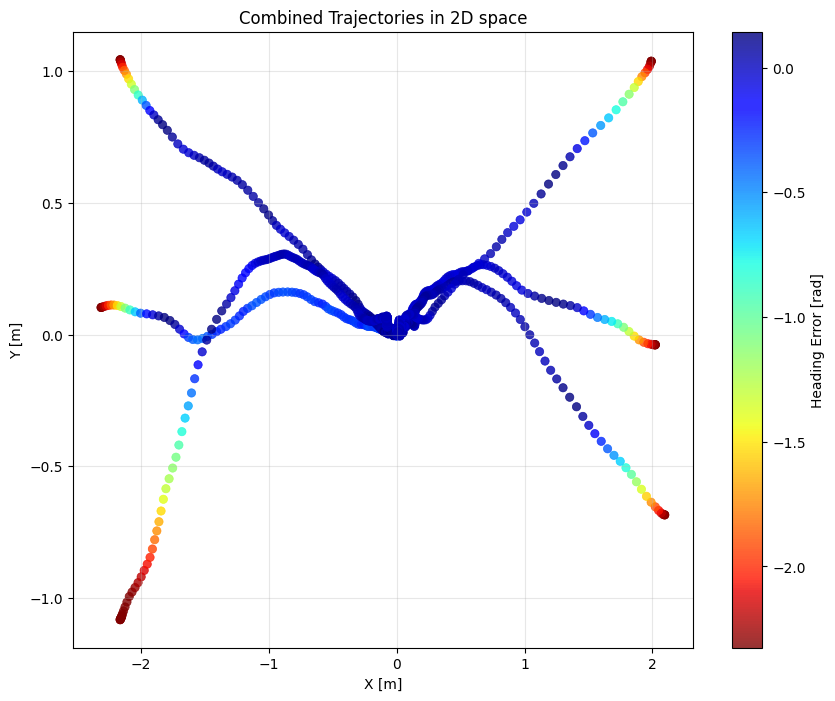

Plotting episode 1 of 3
Plotting episode 2 of 3
Plotting episode 3 of 3


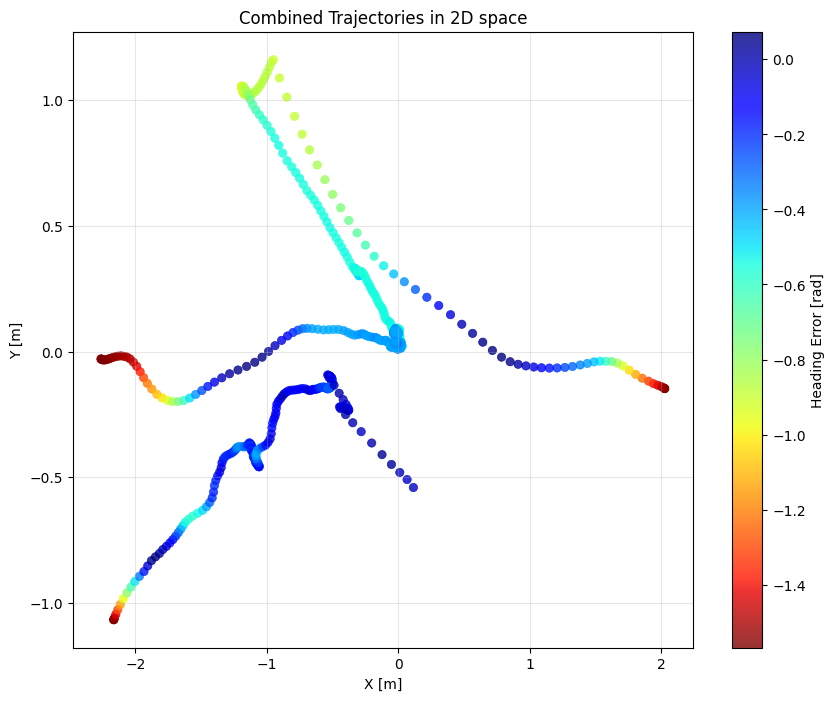

In [7]:

exp_names = ['Pose_RL', 'Pose_RL_kill_2']
lab_exp_dir = "../ros_lab_exp/11_9_23/"

for exp_name in exp_names:
    exp_dir = os.path.join(lab_exp_dir, exp_name)
    lab_exp_episodes = [ep for ep in os.listdir(exp_dir) if ".png" not in ep]

    # Create a single figure to combine the plots
    fig, ax = plt.subplots(figsize=(10, 8))

    for i, episode in enumerate(lab_exp_episodes):
        states = np.load(os.path.join(exp_dir, episode, "obs.npy"), allow_pickle=True)
        states = np.squeeze(states)
        print(f"Plotting episode {i+1} of {len(lab_exp_episodes)}")
        sc = plot_single_pose_traj(states, ax=ax)

    # Customize the appearance of the plot
    plt.colorbar(sc, label='Heading Error [rad]')
    plt.grid(alpha=0.3)
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.title('Combined Trajectories in 2D space')

    # Save the combined plot
    plt.savefig(os.path.join(exp_dir, "combined_trajectories.png"))

    # Show the combined plot
    plt.show()

## GO TO POSE DC

Plotting episode 1 of 4
Plotting episode 2 of 4
Plotting episode 3 of 4
Plotting episode 4 of 4


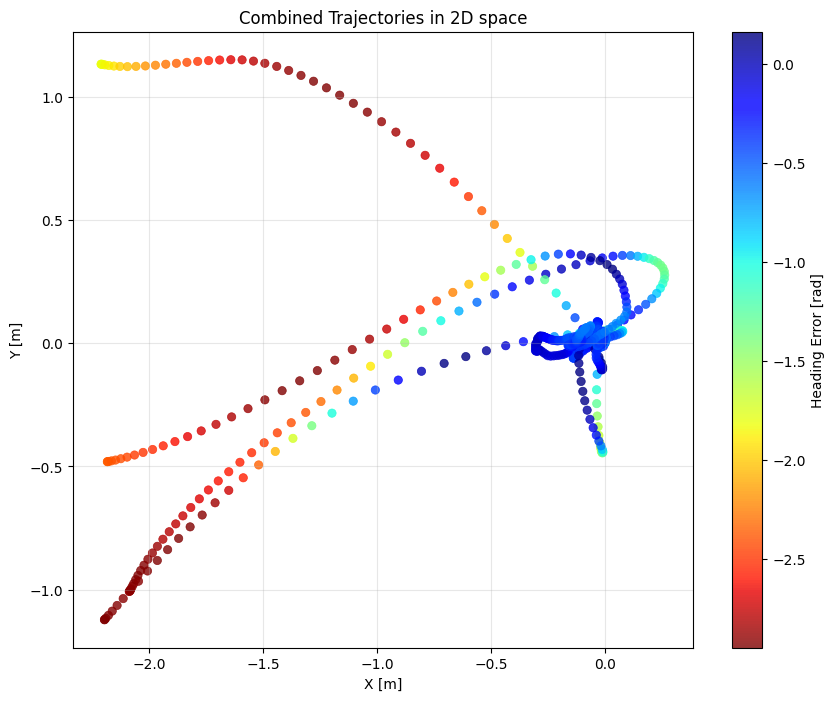

In [12]:

exp_names = ['dc_controller']
lab_exp_dir = "../ros_lab_exp/8_9_23/"

for exp_name in exp_names:
    exp_dir = os.path.join(lab_exp_dir, exp_name)
    lab_exp_episodes = [ep for ep in os.listdir(exp_dir) if ".png" not in ep]

    # Create a single figure to combine the plots
    fig, ax = plt.subplots(figsize=(10, 8))

    for i, episode in enumerate(lab_exp_episodes):
        states = np.load(os.path.join(exp_dir, episode, "obs.npy"), allow_pickle=True)
        states = np.squeeze(states)
        print(f"Plotting episode {i+1} of {len(lab_exp_episodes)}")
        sc = plot_single_pose_traj(states, ax=ax)

    # Customize the appearance of the plot
    plt.colorbar(sc, label='Heading Error [rad]')
    plt.grid(alpha=0.3)
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.title('Combined Trajectories in 2D space')

    # Save the combined plot
    plt.savefig(os.path.join(exp_dir, "combined_trajectories.png"))

    # Show the combined plot
    plt.show()


## other go to pose

Plotting episode 1 of 4
Plotting episode 2 of 4
Plotting episode 3 of 4
Plotting episode 4 of 4


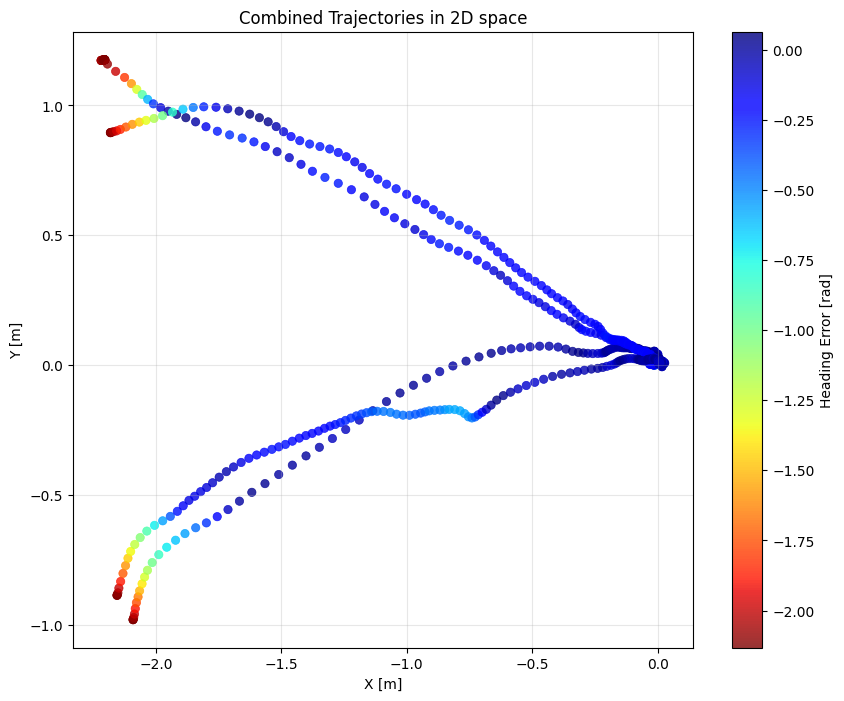

Plotting episode 1 of 3
Plotting episode 2 of 3
Plotting episode 3 of 3


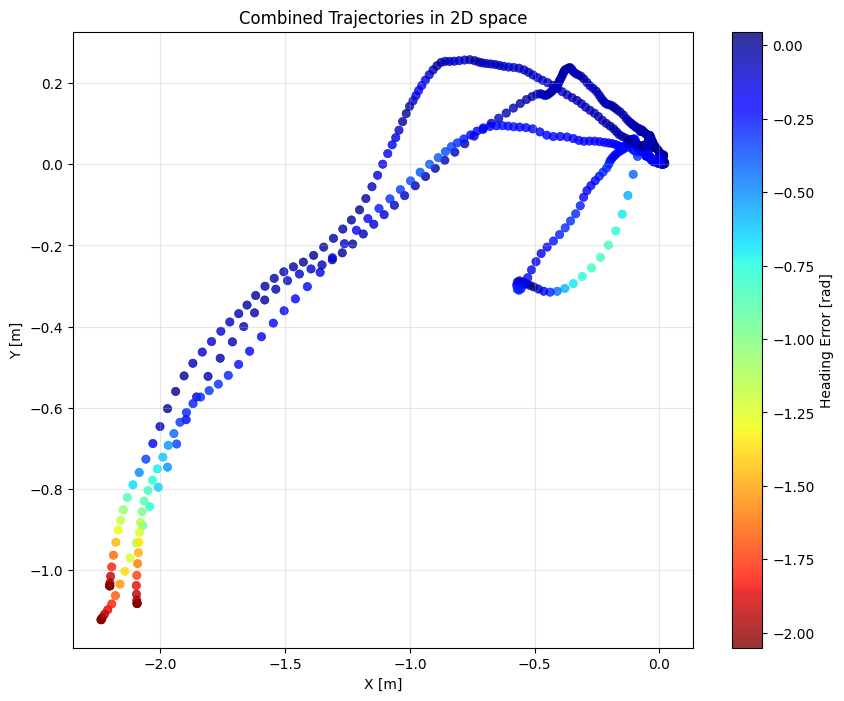

In [10]:

exp_names = ['nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.03_old', 'nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.03']
lab_exp_dir = "../ros_lab_exp/7_9_23/"

for exp_name in exp_names:
    exp_dir = os.path.join(lab_exp_dir, exp_name)
    lab_exp_episodes = [ep for ep in os.listdir(exp_dir) if ".png" not in ep]

    # Create a single figure to combine the plots
    fig, ax = plt.subplots(figsize=(10, 8))

    for i, episode in enumerate(lab_exp_episodes):
        states = np.load(os.path.join(exp_dir, episode, "obs.npy"), allow_pickle=True)
        states = np.squeeze(states)
        print(f"Plotting episode {i+1} of {len(lab_exp_episodes)}")
        sc = plot_single_pose_traj(states, ax=ax)

    # Customize the appearance of the plot
    plt.colorbar(sc, label='Heading Error [rad]')
    plt.grid(alpha=0.3)
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.title('Combined Trajectories in 2D space')

    # Save the combined plot
    plt.savefig(os.path.join(exp_dir, "combined_trajectories.png"))

    # Show the combined plot
    plt.show()
